In [7]:
cd  /Users/driscoll/Documents/GitHub/fnc/matlab
FNC_init

[**Demo %s**](#demo-wave-speed)


We now use a wave speed that is discontinuous at $x=0$.

In [11]:
m = 120;  n = 100;
[x, Dx] = diffcheb(m, [-1, 1]);
c = 1 + (sign(x) + 1) / 2;
chop = @(u) u(2:m);
extend = @(v) [0; v; 0];

u_init = exp( -100*(x + 0.5).^2 );
z_init = -u_init;
ivp = ode(ODEFcn=@f124wave);
ivp.InitialTime = 0;
ivp.InitialValue = [ chop(u_init); z_init ]; 
ivp.RelativeTolerance = 1e-4;
ivp.Parameters = {c, m, Dx, chop, extend};
t = linspace(0, 2, n+1);
sol = solve(ivp, t);
W = sol.Solution;
U = [ zeros(1, n+1); W(1:m-1, :); zeros(1, n+1) ];

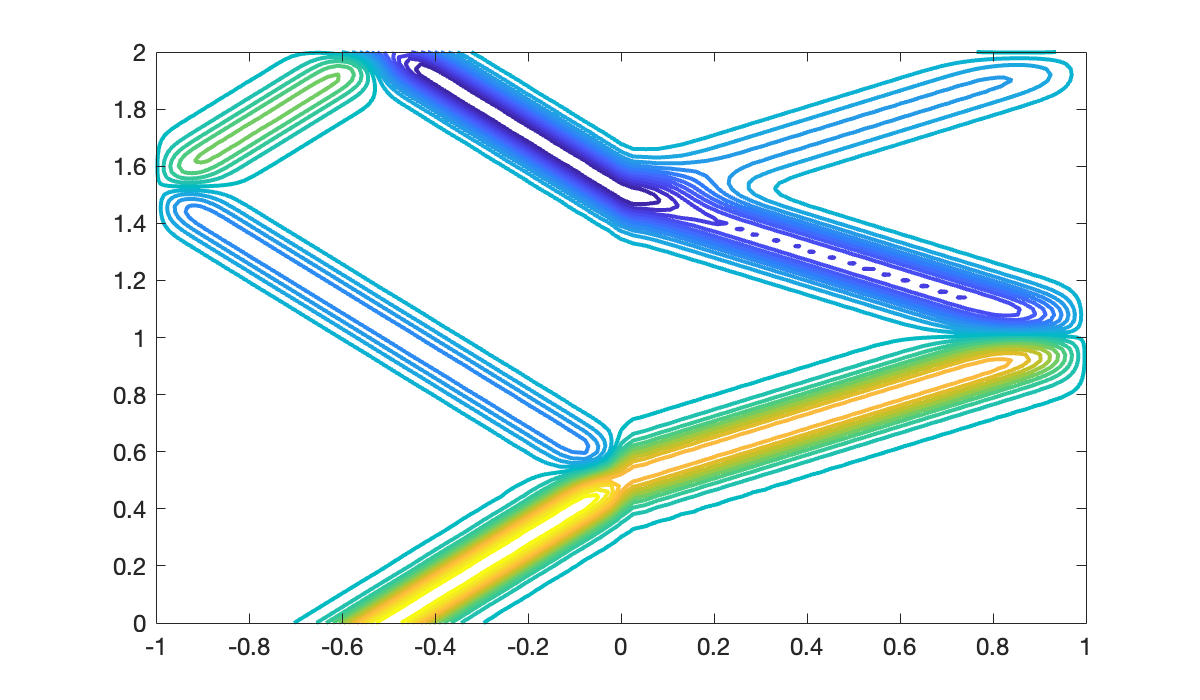

Unrecognized function or variable 'cmap'.

In [12]:
clf,  contour(x, t, U', 24, linewidth=2)
colormap(cmap),  clim([-1, 1])
xlabel x,  ylabel t
title("Wave equation with variable speed")

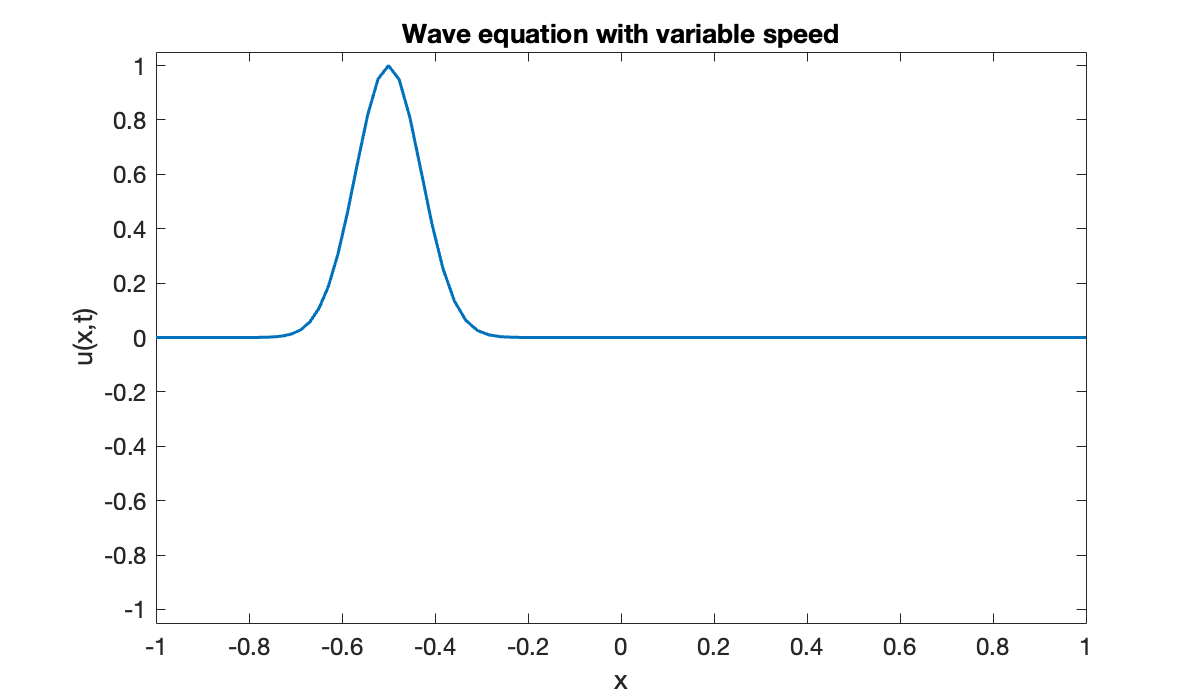

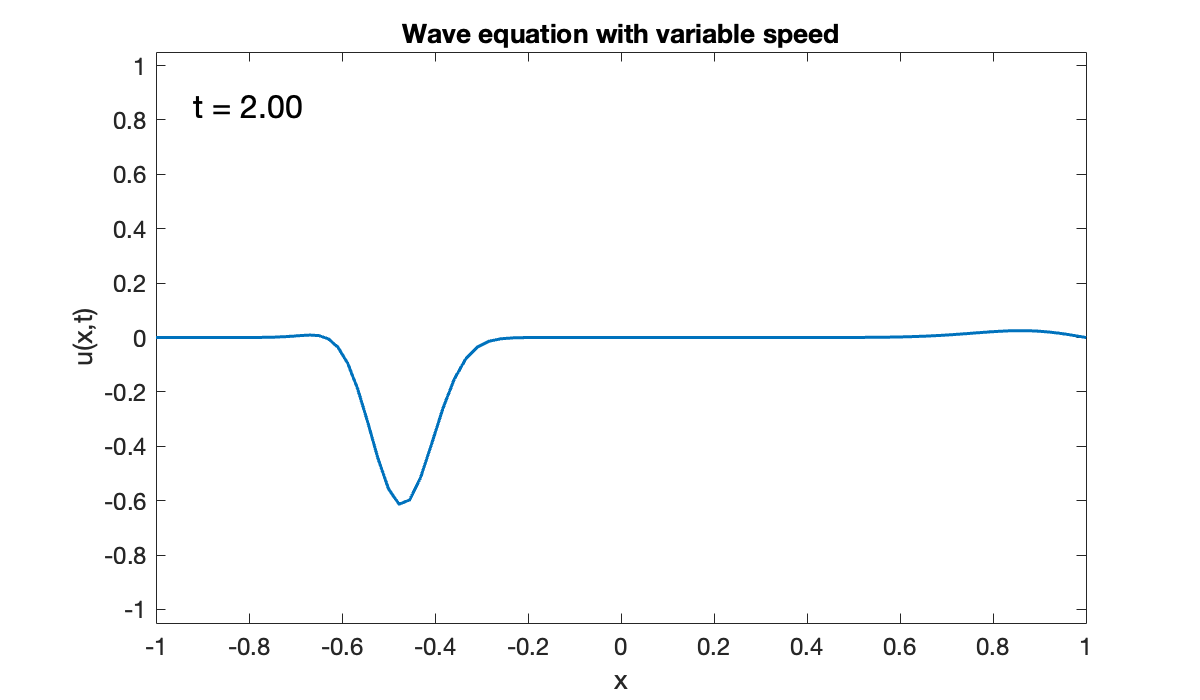

In [13]:
clf
plot(x, U(:, 1))
hold on
axis([-1, 1, -1.05, 1.05])
title("Wave equation with variable speed") 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("figures/wave-speed.mp4", "MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, U(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(-0.92, 0.85, str, fontsize=16);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)

Each pass through the interface at $x=0$ generates a reflected and transmitted wave. By conservation of energy, these are both smaller in amplitude than the incoming bump.